# Session 3 : Exploratory Data Analysis with Plotting and Visualization

Being able to visualise your data and to produce publication quality graphics are key components of the data science approach. Since *"picture is worth a thousand words"*  data can be often better understood when displayed in graphical format rather than a table. 

Therefore the fist step of any data science project is 'Exploratory Data Analysis', often referred to as EDA. EDA is curiosity driven, and is largely concerned with plotting data, looking for hidden correlations, and regrouping the data in a meaningful way.

Python has a strong ecosystem when it comes to ploting figures and EDA. We will mainly look at two libraries: Matplotlib, and Seaborn. With these you can do pretty much any graphical representation you want, using Python code. Although it may seem a bit cumbersome at first to use code to plot graphs, once you have defined graphic functions to make your plot look exactly the way you want, you can apply this function over and over again. So this is an efficient way to prepare and vizualise large volume of data as it scales up easily to new datasets.

## Learning Objectives
1. Understand the syntax of matplotlib
2. Confidently use several types of plot
3. Plot data directly from a Pandas dataframe 
4. Plotting geospatial data

## 3.1 Introduction to the California Earthquake dataset
<a id="primer"></a>

In this section we will demonstrate how we can use matplotlib to visualize and analyse geological data. For this, I have selected a large dataset of earthquake magnitudes in California since the 1970's to today. This is a record of >50 years of earthquake activity which can be retrieved directly from the [US Geological Survey](https://www.usgs.gov/). The version of the data we are using today has been curated by [Saied Mighani](https://github.com/saiedmighani/earthquake_time_series_LSTM) on his Github page.

The goal of our session will be to use matplotlib and pandas for an EDA of this dataset. First, we will need to import our usual suspects (NumPy and Pandas) to load and manipulate the data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# We can now import our Earthquake dataset. Let's call it 'caliquakes_df'
caliquakes_df = pd.read_csv("Datasets/combined_eq_california_clean.csv")

# Exercise 1
A good idea when you load a new dataset is to explore it, see it's size for instance and what columns are present. There are several ways you can do this. Try the following in the cell below, create new cells if needed:

1. Simply open the dataframe by calling it by name
2. Try the '.describe()' method to see how many rows the dataset has, and the different stats
3. Try to find if there are any significant correlation


In [ ]:
# Your Code here


In [3]:
# Solution 1
caliquakes_df

,type,time,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth
0,earthquake,10:50.2,3.32,"21km ENE of Ensenada, B.C., MX",reviewed,0,170,ci,4.0,0.76330,0.46,289.0,ml,-116.420333,31.945000,6.00
1,quarry blast,41:29.6,2.56,"14km NE of Apple Valley, CA",reviewed,0,101,ci,10.0,0.65220,0.56,153.0,ml,-117.086167,34.601667,0.01
2,earthquake,21:08.7,3.58,"41km SSW of Progreso, B.C., MX",reviewed,0,197,ci,4.0,1.10300,0.61,275.0,ml,-115.691000,32.221167,6.00
3,earthquake,00:47.0,2.28,"1km NNE of Fountain Valley, CA",reviewed,0,80,ci,4.0,0.46760,0.22,222.0,ml,-117.947500,33.718333,6.00
4,earthquake,01:31.9,3.17,"22km NNE of Soledad, CA",reviewed,0,155,ci,10.0,NaN,0.50,158.0,ml,-121.207333,36.601000,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313337,earthquake,46:10.2,2.32,"4 km NNW of Lakeland North, Washington",reviewed,0,84,uw,49.0,0.02422,0.38,32.0,ml,-122.304000,47.366000,21.41
313338,earthquake,02:15.8,2.26,"11 km E of Soda Springs, Idaho",reviewed,0,79,uu,19.0,0.28940,0.18,99.0,ml,-111.462667,42.653833,8.80
313339,earthquake,35:08.4,2.14,"35 km NW of Stanley, Idaho",reviewed,0,70,mb,12.0,0.38900,0.26,82.0,ml,-115.220833,44.469000,8.39
313340,earthquake,26:30.9,2.15,"10km NE of Fairmead, CA",reviewed,0,71,nc,8.0,0.09408,0.19,92.0,md,-120.105667,37.126667,16.85


In [4]:
# Solution 2
caliquakes_df.describe()

,mag,tsunami,sig,nst,dmin,rms,gap,longitude,latitude,depth
count,313342.000000,313342.000000,313342.000000,303817.000000,226795.000000,309897.000000,307087.000000,313342.000000,313342.000000,313336.000000
mean,2.503171,0.000565,101.852379,20.500989,0.198006,0.197771,121.016289,-118.583263,37.001109,6.274206
std,0.510198,0.023760,56.402848,23.939964,0.296700,0.430229,82.354134,3.334398,4.004880,6.207468
min,2.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,-131.771000,24.007000,-3.500000
25%,2.140000,0.000000,70.000000,0.000000,0.038740,0.080000,57.000000,-121.236417,34.052000,2.232000
50%,2.350000,0.000000,85.000000,14.000000,0.089190,0.150000,92.400000,-118.096000,36.196250,5.385000
75%,2.700000,0.000000,112.000000,30.000000,0.224300,0.230000,175.000000,-116.320000,38.819500,8.777250
max,7.300000,1.000000,2910.000000,760.000000,7.538000,71.450000,360.000000,-107.001000,50.000000,257.000000


In [5]:
# Solution 3
caliquakes_df.corr()

,mag,tsunami,sig,nst,dmin,rms,gap,longitude,latitude,depth
mag,1.000000,0.105394,0.907839,0.216672,0.189222,0.157596,0.069741,-0.062851,0.057988,0.098708
tsunami,0.105394,1.000000,0.211406,0.055195,0.049761,0.013834,-0.001837,-0.029367,0.014302,0.018876
sig,0.907839,0.211406,1.000000,0.278654,0.141701,0.139869,0.034810,-0.060108,0.050215,0.100912
nst,0.216672,0.055195,0.278654,1.000000,-0.301697,-0.025288,-0.336508,-0.275655,0.096612,0.103817
dmin,0.189222,0.049761,0.141701,-0.301697,1.000000,0.262457,0.575587,0.064888,0.022162,0.061208
rms,0.157596,0.013834,0.139869,-0.025288,0.262457,1.000000,0.109619,0.079734,0.000025,0.012316
gap,0.069741,-0.001837,0.034810,-0.336508,0.575587,0.109619,1.000000,-0.014580,-0.017261,0.131337
longitude,-0.062851,-0.029367,-0.060108,-0.275655,0.064888,0.079734,-0.014580,1.000000,-0.447134,-0.143655
latitude,0.057988,0.014302,0.050215,0.096612,0.022162,0.000025,-0.017261,-0.447134,1.000000,0.060641
depth,0.098708,0.018876,0.100912,0.103817,0.061208,0.012316,0.131337,-0.143655,0.060641,1.000000


What are the two variables with the most significant correlation?

# Exercise 2

We are interested in Earthquakes only. So our first exercise will be to created a new version of `caliquakes_df` where only natural earthquakes are included. This will require you to remember your `pandas` skills from the last lecture!

Do the following:
1. Print neatly the different types of 'quakes' included in the data. You can do this with one line of code...
2. Print how many natural earthquakes are in the dataset...
3. Create a new version of `caliquakes_df` (keep the name!) that only includes earthquakes...

In [6]:
# Your code...


In [7]:
# My solution

print(f'Types of quakes: {caliquakes_df.type.unique()}')
print(f'Number of Earthquakes: {caliquakes_df[caliquakes_df.type == "earthquake"].shape[0]}')

caliquakes_df = caliquakes_df[caliquakes_df.type == "earthquake"]


Types of quakes: ['earthquake' 'quarry blast' 'nuclear explosion' 'explosion' 'other event'
 'mine collapse' 'chemical explosion' 'sonic boom' 'rock burst'
 'Rock Slide' 'mining explosion' 'landslide' 'quarry' 'acoustic noise'
 'not reported']
Number of Earthquakes: 293145


### 3.1.1 Finding potential correlations and data explanation
<a id="primer"></a>

Are there any significant correlations? It seems that the variable `mag` and `sig` are significantly correlated. This is not surprising, because [according to the USGS explanatory notes](https://earthquake.usgs.gov/data/comcat/data-eventterms.php#sig) `mag` is the magnitude of the event, and `sig` is a number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact. So, one would expect this correlation, as magnitude and significance go hand in hand together.

Since we are exploring this dataset, let's define the remaining terms (all according to the USGS):

`Gap`: largest azimuthal gap between azimuthally adjacent stations (in degrees)

`dmin`: Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

`nst`: The total number of seismic stations used to determine earthquake location.

`rms`: The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data. The value is dependent on the accuracy of the velocity model used to compute the earthquake location, the quality weights assigned to the arrival time data, and the procedure used to locate the earthquake.

`tsunami`: This flag is set to "1" for large events in oceanic regions and "0" otherwise. The existence or value of this flag does not indicate if a tsunami actually did or will exist. If the flag value is "1", the event will include a link to the NOAA Tsunami website for tsunami information. The USGS is not responsible for Tsunami warning; they are simply providing a link to the authoritative NOAA source.

`latitude` and `longitude`: coordinates

`depth`: The depth where the earthquake begins to rupture. This is not very well constrained because of the different referencials for depth used by different stations.

`place`: the name of the location where the Earthquake happened: a string.

Ok, now that we are situated, let's plot some data!

## 3.2 Matplotlib
<a id="matplotlib"></a>

In [8]:
from IPython.display import IFrame
display(IFrame('https://youtube.com/embed/SQgrAdeZcLg', width = 640, height = 360))

We will need to import the matplotlib library. There are different API to matplotlib, ranging from the pure matplotlib that you would use in standard Python code, to a more shell-like API similar to MATLAB that is used for plotting into Jupyter Notebooks. A [detailed blog about this is available here](https://queirozf.com/entries/matplotlib-pylab-pyplot-etc-what-s-the-different-between-these) if you are interested. The one we will be using is called 'PyPlot' and the usual name it is imported under is 'plt':

In [9]:
from matplotlib import pyplot as plt

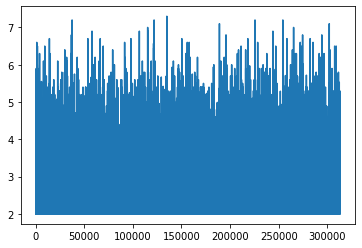

In [10]:
# You can easily plot a categorical plot using this syntax. This plots magnitude against the value index:
plt.plot(caliquakes_df['mag'])

Note something annoying (at least to me): executing the above cell return a plaot of the magnitude versus the index of the data (what we asked for) but also a strong representing the class of the object we plot (the `[<matplotlib.lines.Line2D at 0x7fc716e924e0>]` line). We can suppress this last output by simply adding a semi-colon at the end of the last line:

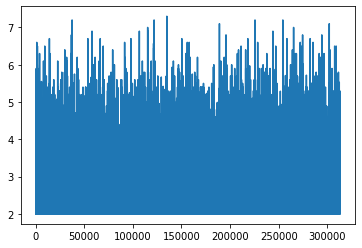

In [11]:
# You can easily plot a categorical plot using this syntax. This plots magnitude against the value index:
plt.plot(caliquakes_df['mag']);

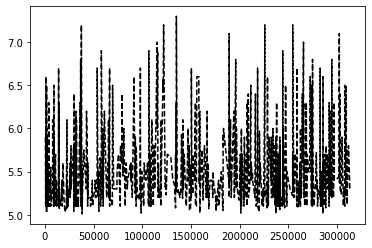

In [12]:
# Let's plot only the earthquakes with a magnitude >5, and plot's plot this in black dashed lines:
caliquakes_largefive = caliquakes_df[caliquakes_df['mag']>5]
plt.plot(caliquakes_largefive['mag'], 'k--');

Note the use above of a string argument to indicate the color (black, or 'k') and the line type ('--'). These different styles [can be found on this page of the matplotlib documentation](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html).

Of course, plotting things against their index is not always the most logical. Sometimes for instance we want to do a scatter plot of two axies. We know that there is a strong correlation between the magnitude of an earthquake and its significance. So let's look at this visually.

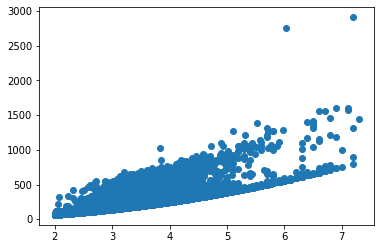

In [13]:
plt.scatter(caliquakes_df['mag'],caliquakes_df['sig']);

Interesting. There seems to be more at play than just magnitude, as two data points are clear outliers, with high magnitude but even higher significance. We will worry about that later.

Let's plot a histogram of frequency of magnitudes. Let's create 70 bins.

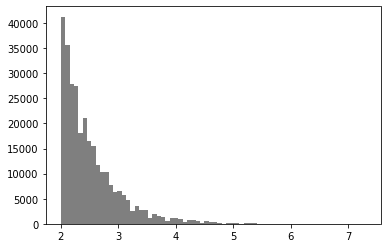

In [14]:
plt.hist(caliquakes_df['mag'], bins=70, color='k', alpha=0.5);

We see from the histogram above that the magnitude of the earthquakes in California is inversely proportional to their frequency. Earthquates above magnitude 5 are comparatively rate.

# Exercise 3
Plot a historgram of the frequency of earthquakes with a magnitude above or equal to 6. Use red for the color of the bins. Limit your plot to 20 bins. Based on your histogram, how many earthquakes of magnitude between 6.0 to 7.2 happen between 1970 and today?

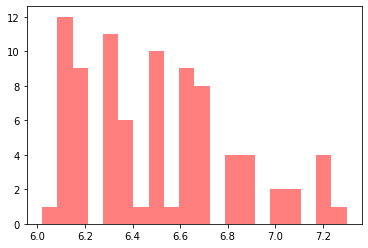

In [15]:
# SOLUTION:

eq_abovesix = caliquakes_df[caliquakes_df['mag']>6]

plt.hist(eq_abovesix['mag'], bins=20, color='r', alpha=0.5);

# 22 earthquakes between 6.0 to 6.2 happened.

### 3.2.1 Figures and Subplots 
<a id="subplots"></a>
The power of matplotlib though is in this ability to do neat figures and costumize pretty much every aspect of a plot. You can find the [full API description of matplotlib and documentation here](https://matplotlib.org/), as the topic is too large to be fully covered in this session. First, let's create a figure object. A figure is a canvas on which we will be able to add subplots. So one figure can have more than one plot associated.

VIDEO: MATPLOTLIB Figures and subplots

In [16]:
# We create a figure that we call 'fig'. We also capture the different subplots in the 'axes' list.
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

We can assign plots to a subplot by refering them by name. For instance, we can plot the historgram of ditribution of earthquakes in subplot[0,0] in red, the significance in [0,1] in blue, the depth in [1,0] in green and the longitude in [1,2] in black:

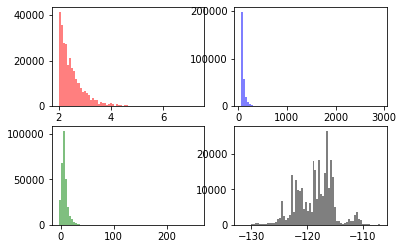

In [17]:
fig, axes = plt.subplots(2, 2)
axes[0,0].hist(caliquakes_df['mag'], bins=70, color='r', alpha=0.5)
axes[0,1].hist(caliquakes_df['sig'], bins=70, color='b', alpha=0.5)
axes[1,0].hist(caliquakes_df['depth'], bins=70, color='g', alpha=0.5)
axes[1,1].hist(caliquakes_df['longitude'], bins=70, color='k', alpha=0.5)

plt.plot();

#### Adjusting the spacing around subplots

If we use the same axis for all plots, we tell pyplot to only print the axis values once to avoid clutter. We can also adjust the spacing between subplots. If we set it to 0, the subplots touch:

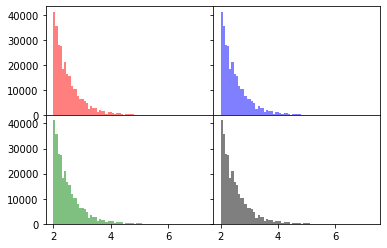

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes[0,0].hist(caliquakes_df['mag'], bins=70, color='r', alpha=0.5)
axes[0,1].hist(caliquakes_df['mag'], bins=70, color='b', alpha=0.5)
axes[1,0].hist(caliquakes_df['mag'], bins=70, color='g', alpha=0.5)
axes[1,1].hist(caliquakes_df['mag'], bins=70, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 3.2.3 Ticks, Labels, and Legends
<a id="ticks"></a>

#### Setting the title, axis labels, ticks, and ticklabels

Let's make our figure a little more personal by changing the ticks, the label, the axis limits and the title.

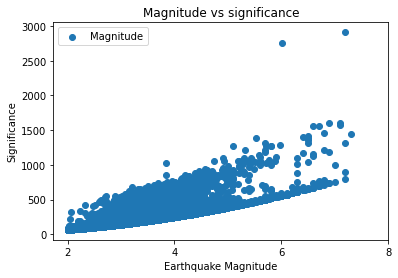

In [19]:
# Let's recreate the magnitude vs significance figure as a subplot of 1 figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(caliquakes_df['mag'],caliquakes_df['sig'], label='Magnitude')

# Now let's stipulate that we only want to see the following ticks:
ticks = ax.set_xticks([2, 4, 6, 8])

# Let's set a title for our figure:
ax.set_title('Magnitude vs significance')

# And appropriate labels for the x and y axes:
ax.set_xlabel('Earthquake Magnitude')
ax.set_ylabel('Significance')

# We can also place a legend. The position determines where the legend will be diplayed. 'Best' lets 
# the library decide where to put it. 
ax.legend()
plt.plot;

Let's focus on the data between magnitude 3 and 4 by setting an axis limit on the x axis:

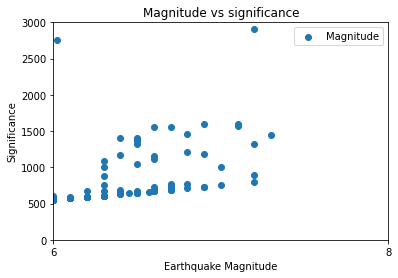

In [20]:
# Since we will use the plot above a few times, let's create a function that creates the plot for us:
def create_plot():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(caliquakes_df['mag'],caliquakes_df['sig'], label='Magnitude')
    ticks = ax.set_xticks([2, 4, 6, 8])
    ax.set_title('Magnitude vs significance')
    ax.set_xlabel('Earthquake Magnitude')
    ax.set_ylabel('Significance')
    ax.legend()
    return (fig, ax)

# Now we set the x and y axis limits to focus on the lower end of the scale:

fig, ax = create_plot()
ax.set_xlim(6,8)
ax.set_ylim(0,3000)
plt.plot;

#### Annotations and Drawing on a Subplot

You can annotation on any subplot by using the following syntax:
```python
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

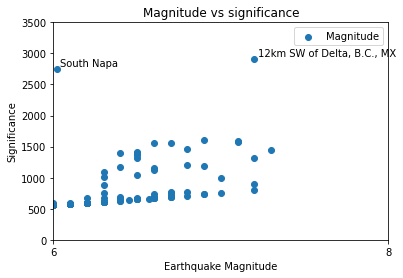

In [21]:
# We can first reuse our plot creation function above. Notice that it returns a tuple with figure and axes. 
# So we can do this to assign a new figure and axes:
fig, ax = create_plot()

# Now let's set some reasonable axis limits for what I want to demonstrate:
ax.set_xlim(6,8)
ax.set_ylim(0,3500)

# And let's label the two outliers data point that have a significance >2500. Let's extract them from the dataframe:

outliers = caliquakes_df[caliquakes_df['sig']>2500] # Remember how to do that?

# Now let's add an annotation to the plot. We will use the name of the place as our label ('place' in the dataset).
# Note the use of the iterrows() function in pandas that returns both the index and the row of the dataframe
# We can use the values of the rows to set an x,y location and plot the data:

for index, row in outliers.iterrows():
    ax.text(row['mag']+.02,row['sig']+50,row['place'])

Now we know where these anomalously significant Earthquakes happened!

## 3.3 Plotting with pandas and Seaborn
<a id="sns"></a>
You can also use [the seaborn statistical plotting library](https://seaborn.pydata.org/) alongside pyplot. Seaborn is often viewed as more modern, and giving the plot a nice look and feel. Let's see a few examples of plotting straight from Pandas with seaborn.

### 3.3.1 Histograms and Density Plots
<a id="snsbar"></a>
We can do horizontal and vertical bar plots using Seaborn. Let's create a dataframe containting the earthquakes with a significance > 1300. Then let's plot a horizontal bar plot with the significance on the x-axis, and the place name on the y-axis.

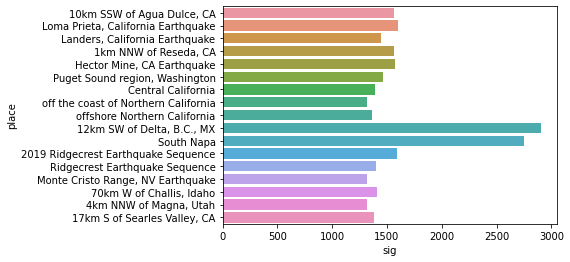

In [22]:
import seaborn as sns # seaborn is traditionally imported as sns
large_quakes = caliquakes_df[caliquakes_df['sig']>1300]
sns.barplot(x='sig', y='place',data=large_quakes, orient='h');

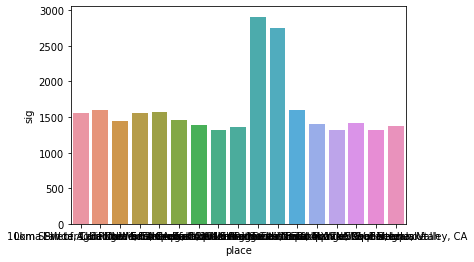

In [23]:
# Of course we can also do a vertical bar plot. We simply need to flip the x and y axes.
sns.barplot(y='sig', x='place',data=large_quakes, orient='v');

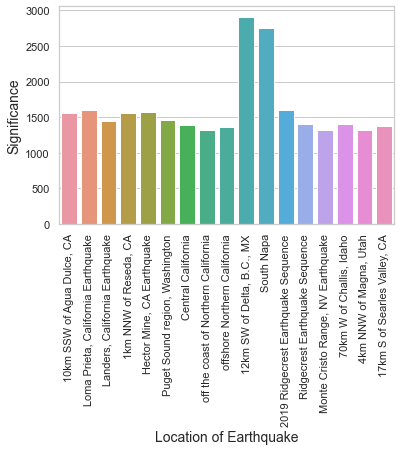

In [24]:
# Clearly the plot above is sub-optimal because the labels are unreadable. We need to rotate the labels to do that. We can also learn how to
# switch the grid of the plot on and off. Let's do that here.

# Switching the grid on. On a bar plot, this will only show for the numerical axis.
sns.set_theme(style="whitegrid")

# Seaborn returns a matplotlib axis. So we can call the pyplot '.xticks' methods to rotate the text
sns.barplot(y='sig', x='place',data=large_quakes, orient='v')
plt.xticks(rotation=90)
# As we are working on it, let's give this better axis names:
plt.xlabel("Location of Earthquake", size=14)
plt.ylabel("Significance", size=14)
plt.plot;

### 3.3.2 Histograms and Density Plots
<a id="snshist"></a>
Let's create a series containting the earthquakes with a magnitude > 6. Then let's look at an alternative way to plot again a histogram of both the magnitude and the significance.

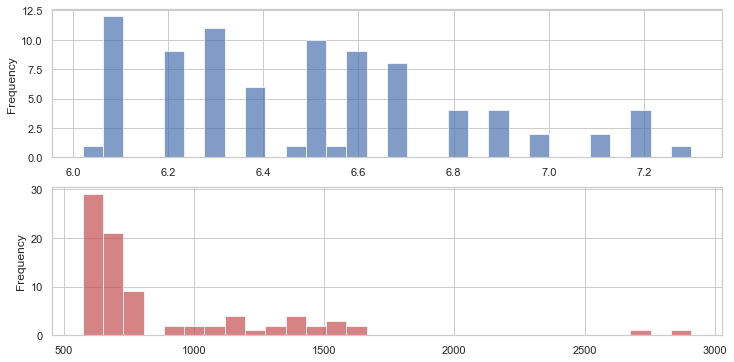

In [25]:
mag = caliquakes_df[caliquakes_df['mag']>6]['mag']
sig = caliquakes_df[caliquakes_df['mag']>6]['sig']

# Whilst we are at it, let's learn how to change the size of the figure when we create it. Simply pass a 'figsize' argument
# Dimensions are in inches for the x and y axis, respectively.
fig, axes = plt.subplots(2, 1,figsize=(12,6))

mag.plot.hist(ax=axes[0], bins=30, color='b', alpha=0.7) # alpha is transparency, from 0 (not visible) to 1 (fully opaque)
sig.plot.hist(ax=axes[1], bins=30, color='r', alpha=0.7);

Note that the grid is on, and this time both numerical axis show it. That's because the style option in the 'set_theme' parameter of Seaborn was set globally for our session. You might want to [explore the various options you have with set_theme in Seaborn](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) as this impacts the way your figures look. For instance we can completly change the look and feel of the previous plot (and all plots on the notebook at the same time) without changing the code of the figure but simply by dchanging the seaborn theme:

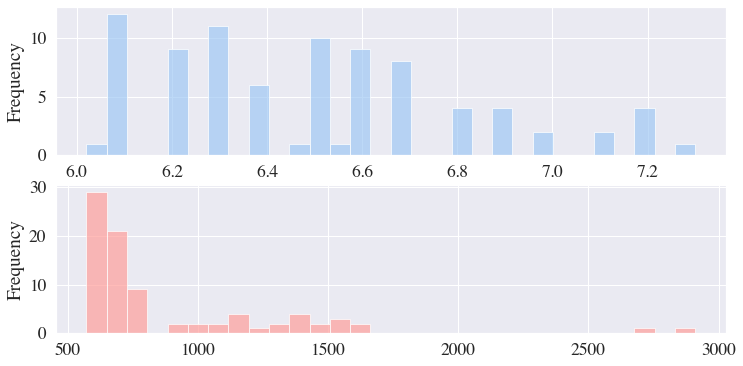

In [26]:
sns.set_theme(style='darkgrid', palette='pastel', color_codes=True, font='Times', font_scale=1.6)
fig, axes = plt.subplots(2, 1,figsize=(12,6))
mag.plot.hist(ax=axes[0], bins=30, color='b', alpha=0.7)
sig.plot.hist(ax=axes[1], bins=30, color='r', alpha=0.7);

We can also do density plots, to see where most of the distribution of values are. For instance, is there a particular longitude where most earthquakes are spotted? Let's see!


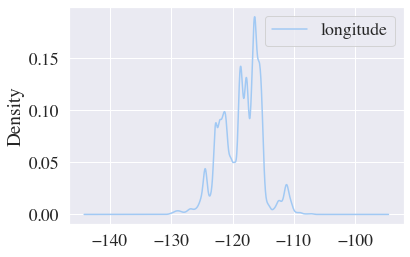

In [27]:
caliquakes_df[['longitude']].plot.density();

Indeed it seems that around 118 degrees West we have more earthquakes! We will revisit this later in this session.

### 3.3.3 Scatter Plot with Regression
<a id="snsscatter"></a>
We can also of course plot scatter plots with Seaborn. In Seaborn, this is coming out of the box with a regression through the data. Here is the same scatter plot than before, i.e. magnitude vs significance of earthquakes, but in seaborn:     

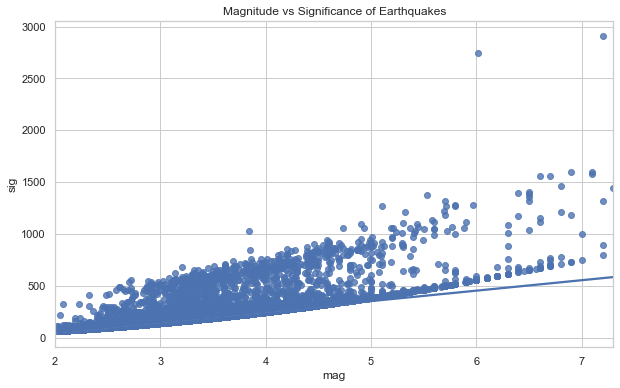

In [28]:
# Let's reset the seaborn parameters to values I actually like
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10,6))
sns.regplot(x='mag', y='sig', data=caliquakes_df) # Notice how in Seaborn the data is an argument passed to the library
plt.title('Magnitude vs Significance of Earthquakes');

Notice how the regression line is so skewed towards the lower values, and at the upper end of the magnitude scale it totally fails to be a good predictor of significance? This is because more of the data is in the amplitude < 5, so we are skewing the plot. Let's try a regression for the earthquakes with magnitude > 5.

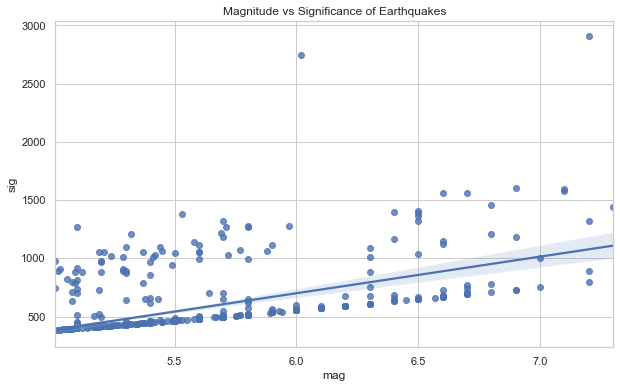

In [29]:
data = caliquakes_df[caliquakes_df['mag']>5]
plt.figure(figsize=(10,6))
sns.regplot(x='mag', y='sig',data=data)
plt.title('Magnitude vs Significance of Earthquakes');

Now it is much clearer that the regression was skewed by lower values (still is). Notice that we have even a confidence interval plotted on the regression. If you don't want the regression line, simply pass this argument to the function: 
```python 
fit_reg=False
``` 
Alternatively, you can also turn off the scatter data and only plot the regression:
```python
scatter=False
```
Another useful way to represent the data is to bin the x-axis values. This does not change the regression line, but it declutters the plot. You can also pass a 'x_ci' parameters to display the error on each bin. This means 'confidence interval', but if you pass the 'sd' value to this argument it will s so you can immediately see the variability of the data. Let's try it:

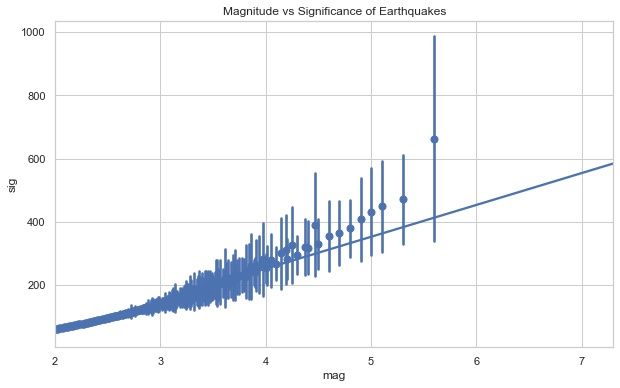

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x='mag', y='sig', x_bins= 1500, x_ci="sd",data=caliquakes_df) # Notice how in Seaborn the data is an argument passed to the library
plt.title('Magnitude vs Significance of Earthquakes');

The example above shows ***(1)*** most of the data is really below magnitudes of 4. Even when creating 1500 bins as I did, the magnitudes >6 fall in the last bin and are not plotted separately. I need to create >10k bins to see them, and ***(2)*** that the significance becomes increasingly harder to predict with increasing magnitude (the standard deviation of each bin is increasing).

### 3.3.4 Pairplot - A convenient way to find correlations
<a id="snspairplot"></a>
Pairplots are a great way to visually look at the relationship between variables. Remember that you looked at the regression values between different variable at the begining of this session? Here, we will use a pairplot for the same purpose. The pairplot is a matrix of plot, each variable being plotted against the others. The diagonal of the pairplot is essentially each variable plotted against itself. Because this is not so interesting in itself, we can choose to plot the density distribution (or 'KDE') of the variable instead (essentially a histogram of frequency).

Our original dataframe has a few too many variables to plot well. In the previous session, you learned to drop and select variables form a dataframe. So let's do that now as an exercise.

## Exercise 4
Create a new dataframe called 'caliquakes_light' (see below) that is a subset of caliquake_df that filter and keeps only data with a magnitude >= 4.8 (to speed up the graphs) and only contains the following series:
* mag
* sig
* depth
* dmin
* rms
* nst

We will use this new dataframe later to plot our pairplot.

**Hint:** You can either drop entries from *caliquakes_df*, or select the six entries you need from that dataframe. The later seams easier in this case. Remember: you can use the '.loc' function to retrieve records and columns, and multiple entries are passed by a list. Don't hesitate to google to find the solution, this is part of the process.

In [31]:
# Solution:
caliquakes_light = caliquakes_df[caliquakes_df['mag']>=4.8].loc[:,['mag','sig','depth','dmin','rms','nst']]
caliquakes_light

,mag,sig,depth,dmin,rms,nst
403,5.00,385,33.00,NaN,NaN,NaN
467,5.90,536,10.00,NaN,NaN,NaN
652,5.40,449,33.00,NaN,NaN,NaN
663,5.22,419,10.75,NaN,0.3600,17.0
697,5.10,400,33.00,NaN,NaN,NaN
...,...,...,...,...,...,...
311794,4.90,384,6.50,0.0300,0.1765,21.0
312211,4.80,378,5.20,0.0410,0.1740,32.0
312433,5.53,1380,8.44,0.0396,0.2100,85.0
312762,4.93,875,11.54,0.0189,0.3100,111.0


Now let's plot our pairplot, using the density function (kde) for our diagonal. Let's also set an alpha of 0.2 because we have so much data.

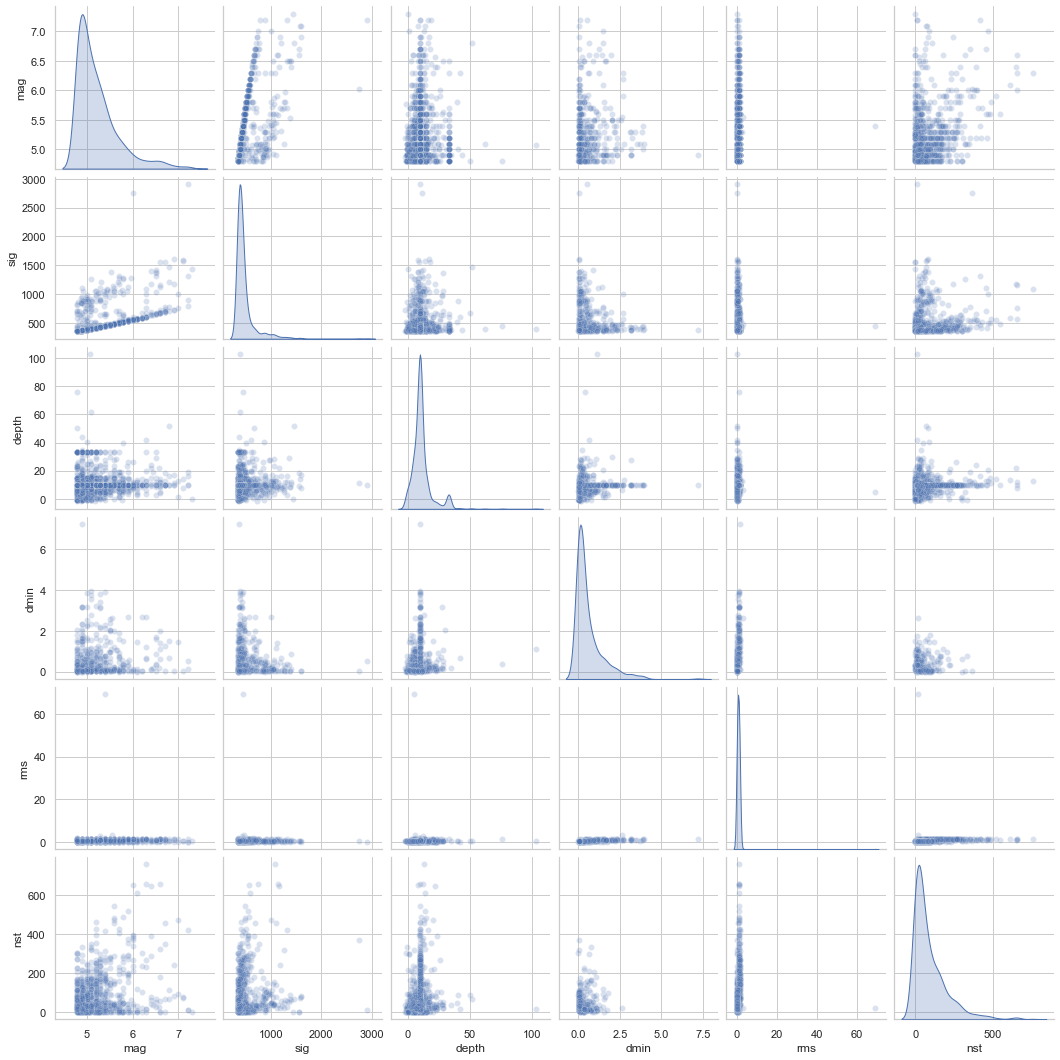

In [32]:
sns.pairplot(caliquakes_light, diag_kind='kde', plot_kws={'alpha': 0.2});

And we have a visual view on the distribution and correlations between our different datasets. We can also use a similar library in pandas, called scattermatrix. This would be done as follows:

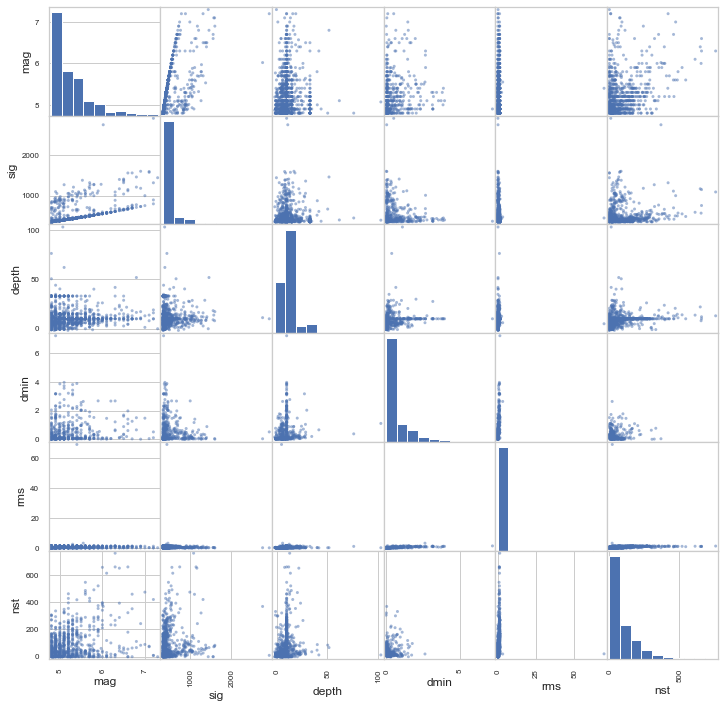

In [33]:
# Using pandas scatter matrix
plt.close('all')
pd.plotting.scatter_matrix(caliquakes_light, figsize=(12,12))
plt.show();

I tend to find the seaborn results more pleasing, but this is a question of personal preferences.

## 3.4 Plotting Geo-referenced data
<a id="georef"></a>
Often in geosciences we need to plot things over a map or an image. This is of course the case for earthquakes too! So, let's see how we can do that.

First, let's redefine a dataframe for the earthquakes with a magnitude > 6.7. Then we will plot this on a map of california.

In [34]:
bigquakes_df = caliquakes_df[caliquakes_df['mag']>6.7]

matplotlib has a module called 'image' that allows you to open images. I have also saved a png image of the state of california in the 'img' folder of this course. All we need to do is the following:

* Import the image module form matplotlib
* Import the specific image from the folder using image read
* Plot the image, specifying the axis dimensions of this image. In this case, this means the coordinates of the image edges, which are 124.55 to 113.80 degrees West, 32.45 to 42.05 degrees North
* Plot whatever else we want on top of this image.

Let's do it!

<ipython-input-41-1023f7c6c5f5>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(tick_values, fontsize=14)


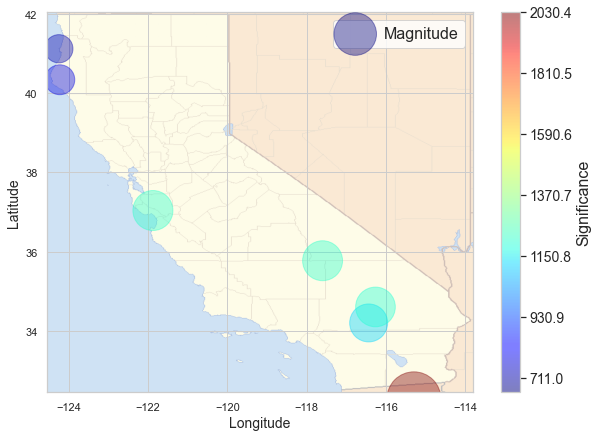

In [41]:
# Read the image
california_img=plt.imread('img/california.png')

# Create a plot, in this case, a scatter plot of bigquakes_df. Plot the latitute and longitude as x-y coordinates, and use the magnitude times 10 as the size of the symbol
ax = bigquakes_df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s="sig", label="Magnitude", # use the significance for the size of the point and its colour
                       c="sig", cmap=plt.get_cmap("jet"), 
                       colorbar=False, alpha=0.4,
                      )

# Use imshow to plot the image
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Create a color bar on the side, based on the significance value. This is optional, but nice!
mag = bigquakes_df["sig"]
tick_values = np.linspace(mag.min(), mag.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(tick_values, fontsize=14)
cbar.set_label('Significance', fontsize=16)

plt.legend(fontsize=16);

#### Saving figures
This is such a nice plot that we want to save it! It's very easy: simply use the 'savefig' method and pass a string argument of the path you want, a format, and resolution. Here, I will save it into my 'img' folder as 'california_big_quakes'. I chose the 'png' format but you can also choose 'jpeg' and many other formats. A very useful thing to do for your Msci thesis or other reports where you need stunning graphics:

In [36]:
plt.savefig('img/california_big_quakes', format='png', dpi=300);

<Figure size 432x288 with 0 Axes>

Neat no? Now we can visually see where the large earthquakes are! But you will do even better in the next exercise: open the next notebook.